# 8. Gradient Descent

## The Idea Behind Gradient Descent
- We’ll frequently need to maximize (or minimize) a function 𝑓. That is, we need to find the input v that produces the smallest (<b>or largest) possible value.</b>

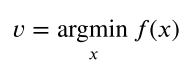


- The gradient ∇𝑓 (the vector of partial derivatives) gives the input direction in which the function <b>most quickly</b> decreases or increases.

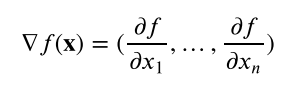

- At minimum or maximum, the gradient of 𝑓 is <b>0</b>: ∇𝑓(𝐯) <b>= 0</b>

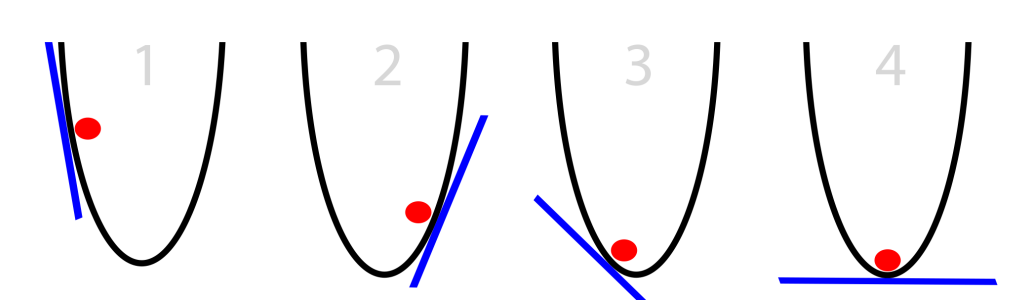

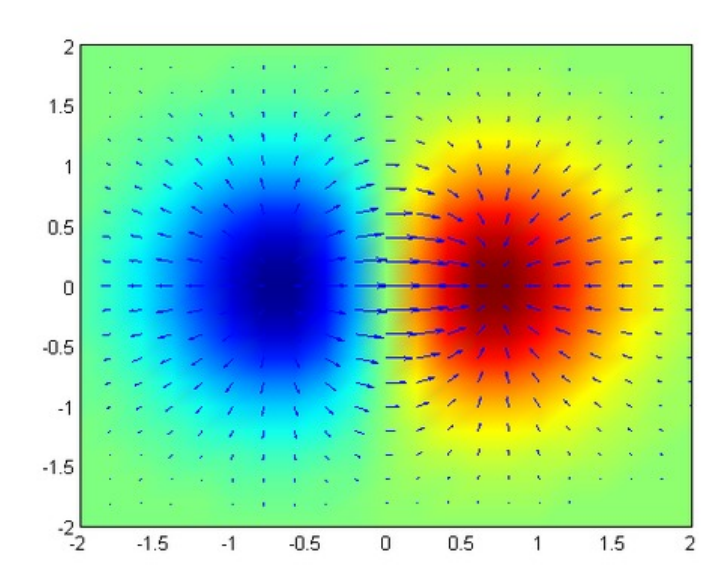

- gradient 방향쪽이 더 높음 -> 즉 빨간쪽이 높고 파란쪽이 낮다.
- y축은 빨간쪽 가운데로 생각할 수 있다

## Minimize or Maximize
- One approach to minimizing a function is to
    1. Pick a <b>random</b> starting point,
    2. Compute the <b>gradient</b>,
    3. Take a small step in the <b>opposite direction of the gradient</b>
    4. Repeat with the new starting point.
- Gradient is the direction that causes the function to decrease the most
- Similarly, you can try to maximize a function by taking small steps in the gradient direction

<b>Using mathematical notation</b>
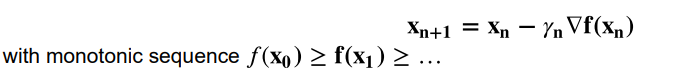

- We usually use gradient descent algorithm to find
    - weight w minimizing loss, cost, or error (regression, neural network) or
    - parameter maximizing a probability (MLE: maximum likelihood estimation)

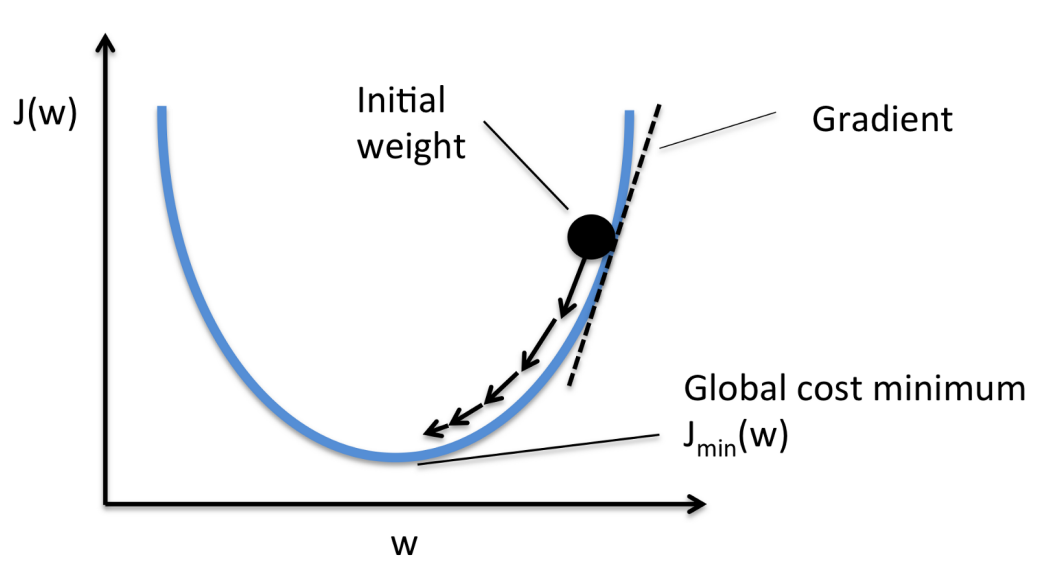

- When input is two dimemsional
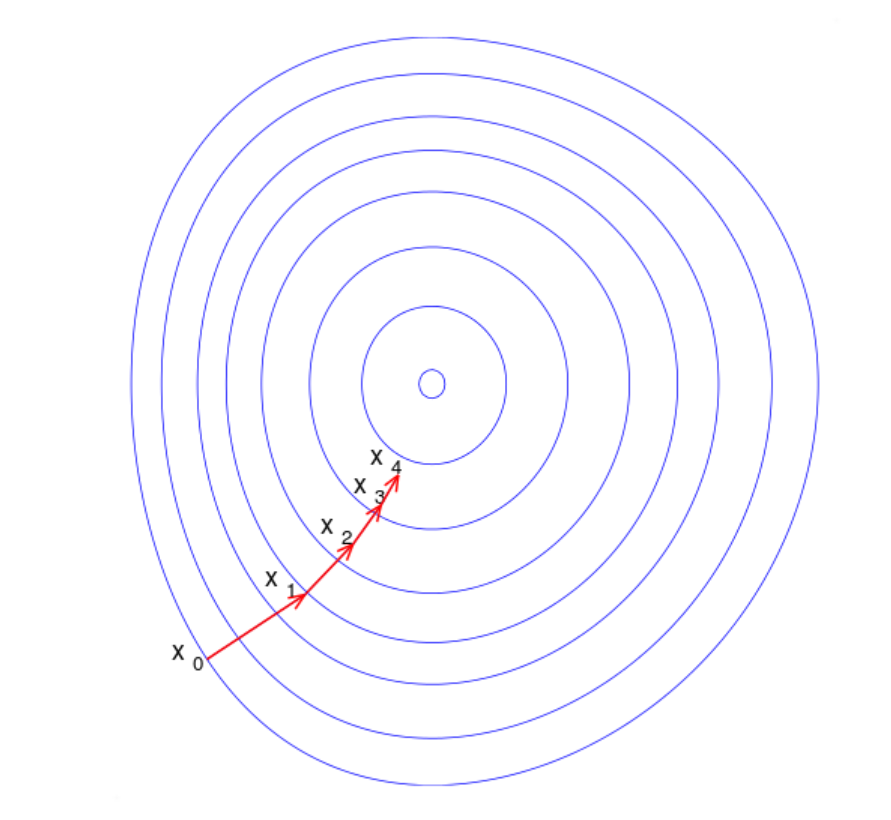

- "Zig-Zagging" nature of Gradient Descent
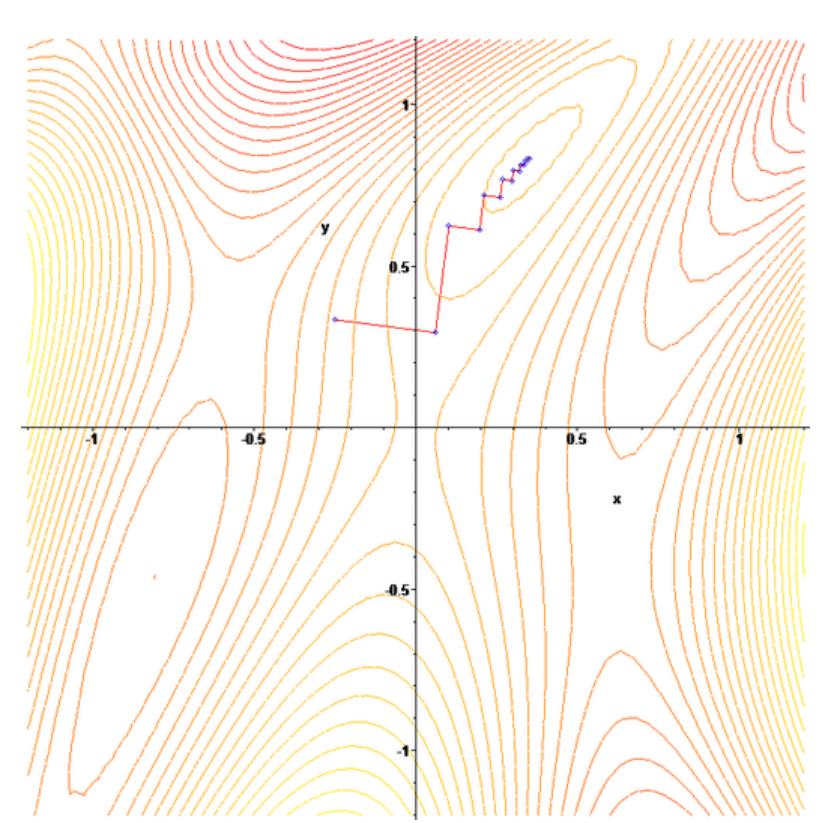

In [1]:
from collections import Counter
#from linear_algebra import distance, vector_subtract, scalar_multiply
from functools import reduce
import math, random

def vector_subtract(v, w): # 벡터 차
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def scalar_multiply(c, v): # 벡터 크기 * 스칼라 곱
     return [c * v_i for v_i in v]
    
def squared_distance(v, w):
     return sum_of_squares(vector_subtract(v, w))
    
def distance(v, w):
     return math.sqrt(squared_distance(v, w))

We want to minimize <b>sum_of_squares</b> function

In [2]:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

## Estimating the Gradient
If f is a function of one variable, its derivative at a point x measures how f(x) changes when we make a very
small change to x .

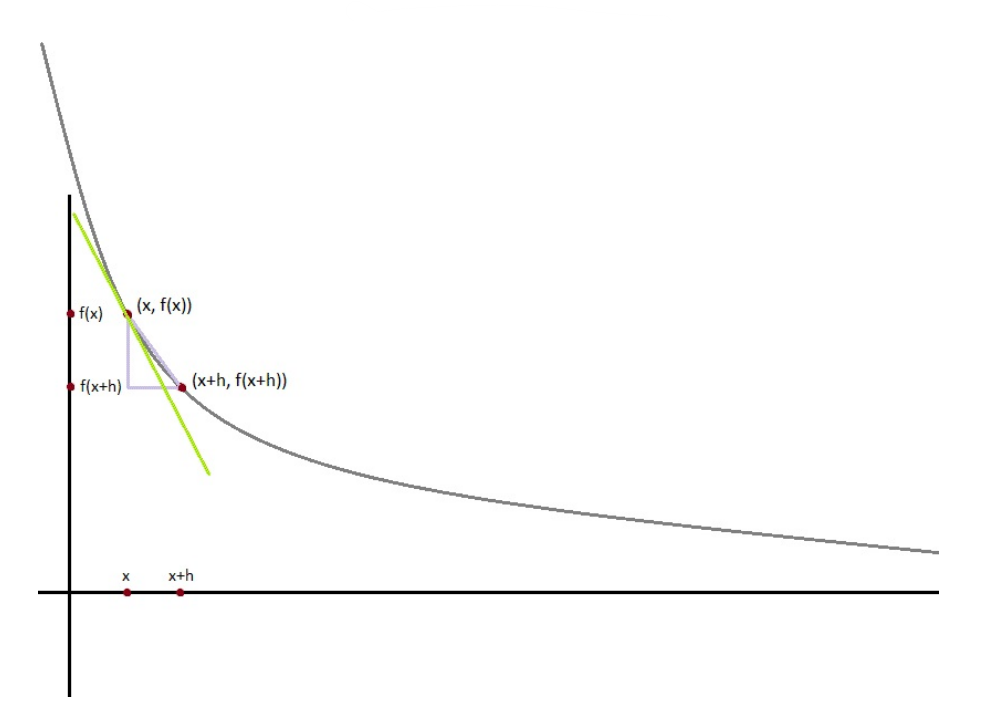

In [3]:
def difference_quotient(f, x, h):
     return (f(x + h) - f(x)) / h

In [4]:
def plot_estimated_derivative():
    
    def square(x):
        return x * x
    
    def derivative(x):
        return 2 * x
    
    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)
    
    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    x = range(-10,10)
    plt.plot(x, list(map(derivative, x)), 'rx', label='Actual') # red x
    plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate') # blue +
    plt.legend(loc=9)
    plt.title('Actual vs Estimate')
    plt.show() # purple *, hopefully

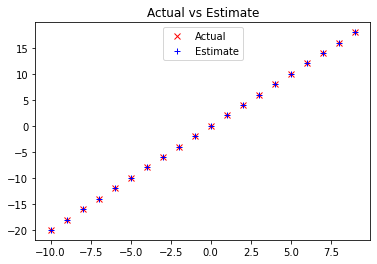

In [5]:
%matplotlib inline
plot_estimated_derivative()

## Numerical gradient
- When f is a function of many variables, it has multiple partial derivatives, each indicating how f changes when we make small changes in just one of the input variables.
- We calculate its ith partial derivative by treating it as a function of just its ith variable, holding the other variables fixed:

In [6]:
def partial_difference_quotient(f, v, i, h):
    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0)
        for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h

In [7]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

In [8]:
estimate_gradient(sum_of_squares, [1.,1.,1])

[2.00001000001393, 2.00001000001393, 2.00001000001393]

In [9]:
import numpy as np

def estimate_gradient_np(f, v, h=0.00001):
     return (np.apply_along_axis(f, 1, v + h * np.eye(v.shape[0])) - f(v)) / h

In [10]:
estimate_gradient_np(lambda v: np.sum(v * v), np.array([1.,1.,1]))

array([2.00001, 2.00001, 2.00001])

## Using the Gradient
- The sum_of_squares function is smallest when its input v is a vector of zeros.
- We want to verify the fact using gradient descent.
- (<b>Gradient descent</b>) Let’s use gradients to find the minimum among all three-dimensional vectors. We’ll just pick a random starting point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small

In [11]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
     return [2 * v_i for v_i in v]

Remark: <b>step_size</b> is also called <b><i>learning_rate</i></b>

In [12]:
def step_np(v, direction, step_size):
    """move step_size in the direction from v"""
    return v + step_size * direction

def sum_of_squares_gradient_np(v):
     return 2 * v

In [13]:
print("using the gradient")

v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

while True:
    #print(v, sum_of_squares(v))
    gradient = sum_of_squares_gradient(v) # compute the gradient at v
    next_v = step(v, gradient, -0.01) # take a negative gradient step
    if distance(next_v, v) < tolerance: # stop if we're converging
        break
    v = next_v # continue if we're not

print("minimum v", v)
print("minimum value", sum_of_squares(v))
print()

using the gradient
minimum v [3.5544203636441233e-06, 2.6658152727330933e-06, -2.2215127272775794e-06]
minimum value 2.4675593987281308e-11



## Choosing the Right Step Size (or Learning rate)
Although the rationale for moving against the gradient is clear, how far to move is not. Indeed, choosing the right step size is more of an art than a science. Popular options include:
- Using a fixed step size
- Gradually shrinking the step size over time
- At each step, choosing the step size that minimizes the value of the objective function

The last sounds optimal but is, in practice, a costly computation. We can approximate it by trying a variety of step sizes and choosing the one that results in the smallest value of the objective function:


In [14]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

- If learning rate is too large, it diverges.
- If learning rate it too small, it converges too slow or may fall into local minimum

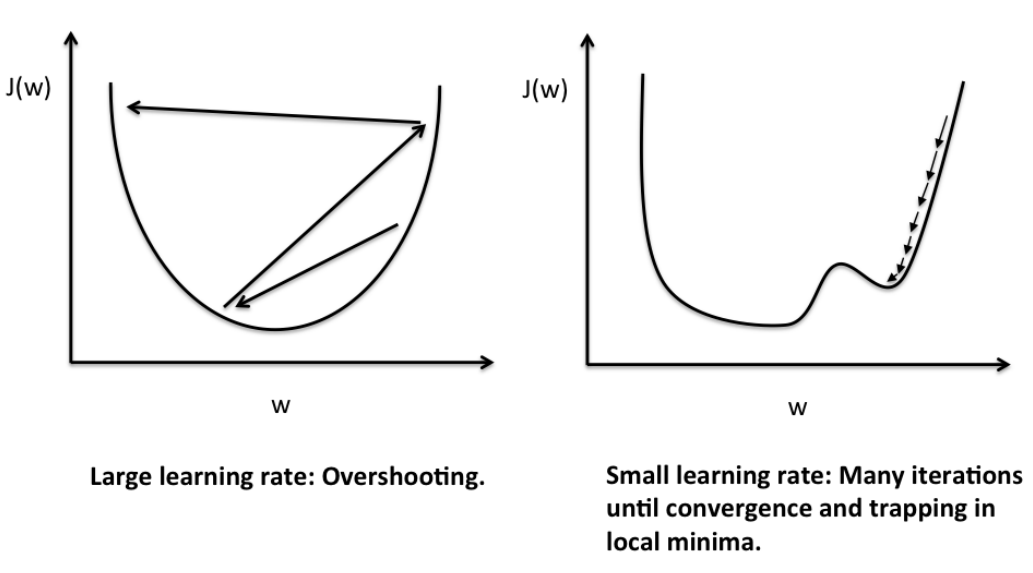

## Experiment with various learning rates
    # in class, changes lr = 10, 1.1, 1, 0.1, 0.01
    # 10 : diverge
    # 1.1: diverge
    # 1: oscilliating
    # 0.1: good pace
    # 0.01 : two slow

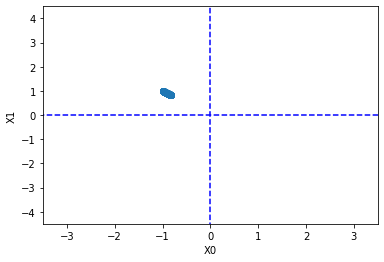

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sum_of_squares_gradient_np(v):
     return 2 * v

def gradient_descent(gradient_f, init_x, lr=0.01, step_num=10000, tolerance=0.0000001):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        x_prev = x.copy()
        x -= lr * gradient_f(x)
        if np.linalg.norm(x - x_prev) < tolerance: # stop if we're converging
            break
    return x, x_history

init_x = np.array([-1.0, 1.0])

lr = 0.001 # try with 10, 1.1, 1, 0.1, 0.01
step_num = 100
x, x_history = gradient_descent(sum_of_squares_gradient_np, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
x_history = np.array(x_history)
plt.plot(x_history[:,0], x_history[:,1], 'o')       

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

- (<b>Out of function domain</b>) Certain step sizes will result in invalid inputs for our function
- So we’ll need to create a “safe apply” function that returns infinity for invalid inputs:

In [16]:
def safe(f):
    """define a new function that wraps f and return it"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf') # this means "infinity" in Python
    return safe_f

## Putting It All Together
In the general case, we have some target_fn that we want to minimize, and we also have its gradient_fn . For example, the <b>target_fn could represent the errors in a model as a function of its parameters</b>, and we might want to <b>find the parameters that make the errors as small as possible</b>.

In [17]:
#
#
# minimize / maximize batch
#
#
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""
    
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta = theta_0 # set theta to initial value
    target_fn = safe(target_fn) # safe version of target_fn
    value = target_fn(theta) # value we're minimizing
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
        
        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

<b>Example : Minimizing sum_of_squares</b>

In [18]:
minimize_batch(sum_of_squares, sum_of_squares_gradient, [10,20,4,5])

[0.0006805647338418772,
 0.0013611294676837543,
 0.00027222589353675085,
 0.0003402823669209386]

In [19]:
minimize_batch(sum_of_squares, sum_of_squares_gradient, [10,20,4,5,0,1])

[0.0006805647338418772,
 0.0013611294676837543,
 0.00027222589353675085,
 0.0003402823669209386,
 0.0,
 6.805647338418771e-05]

<b>Example : Centering a certain point</b>

In [20]:
def myf(v):
     return (v[0]-3)**2 + (v[1]-2)**2
def myf_gradient(v):
     return [2.0*v[0]-6, 2.0*v[1]-4]

minimize_batch(myf, myf_gradient, [5000.,50.])

[3.0016059738814325, 2.000015426605225]

In [21]:
from functools import partial

def f1(x, c):
    x = np.array(x)
    c = np.array(c)
    return np.sum((x - c)**2)

def f1_gradient(x, c):
    x = np.array(x)
    c = np.array(c)
    return 2*x - 2*c

def numerical_gradient(v, f, h=0.00001):
     return (f(v) - np.apply_along_axis(f, 1, v - h * np.eye(len(v)))) / h

c = np.array([7,70,7,4])

f = partial(f1, c=c)
#gradient_f = partial(numerical_gradient, f=f)
gradient_f = partial(f1_gradient, c=c)

minimize_batch(f, gradient_f, [0,0,0,0])

[6.999843894783611, 69.99843894783609, 6.999843894783611, 3.9999107970192056]

Sometimes we’ll instead want to maximize a function, which we can do by minimizing its negative (which has a corresponding negative gradient):

In [22]:
def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                           negate_all(gradient_fn),
                           theta_0,
                           tolerance)

<b>Maximizing batch Example</b>
- Find the variable maximizing normal pdf.
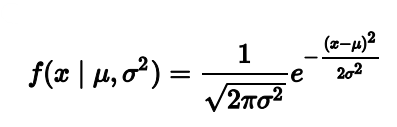

In [23]:
from functools import partial

def normal_pdf(npx, mu, sigma):
    x = npx[0]
    return ((1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))))

def numerical_gradient(v, f, h=0.00001):
    return (np.apply_along_axis(f, 1, v + h * np.eye(len(v))) - f(v)) / h

f = partial(normal_pdf, mu=0, sigma=1)
gradient_f = partial(numerical_gradient, f=f)
init_x = np.array([-4.])

maximize_batch(f, gradient_f, init_x)

[-0.0023954427570109793]

## Stochastic Gradient Descent
- <b>Batch gradient descent</b>
    - In batch approach, each gradient step requires us to make a prediction and <b>compute the gradient for the whole data set</b>, which makes each step <b>take a long time</b>.
- Usually, <b>error functions are additive</b>, which means that the predictive error on the whole data set is simply <b>the sum of the predictive errors for each data point</b>.
- <b>stochastic gradient descent</b>
    - <b>stochastic gradient descent</b> computes the gradient (and takes a step) for only one point at a time.
    - It cycles over our data repeatedly until it reaches a stopping point. During each cycle, we’ll want to iterate through our data in a random order:

### Batch vs SGD vs Mini-batch

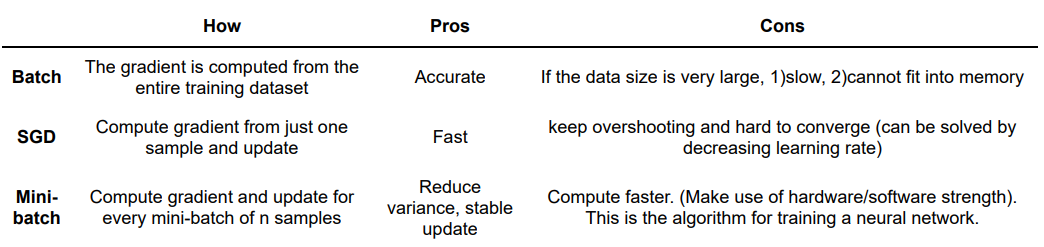

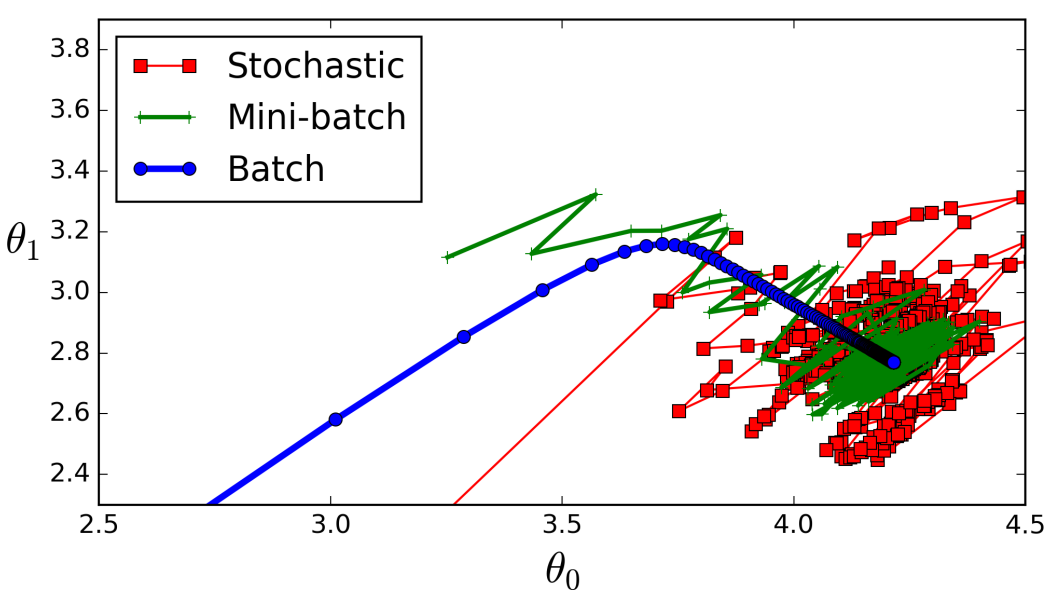

<b>NeuralNet Terminology: Epoch</b>
- One epoch is when an entire dataset is consumed for training.

In [24]:
#
# minimize / maximize stochastic
#
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)] # create a list of indexes
    random.shuffle(indexes) # shuffle them
    for i in indexes: # return the data in that order
        yield data[i]

<b>Understanding SGD Code</b>
  - x is a training data set
  - y is a label (or class) set

In [25]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = list(zip(x, y))
    theta = theta_0 # initial guess
    alpha = alpha_0 # initial step size
    min_theta, min_value = None, float("inf") # the minimum so far
    iterations_with_no_improvement = 0
    
    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )
        
        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9
        
        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    
    return min_theta

In [26]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                                negate_all(gradient_fn),
                                x, y, theta_0, alpha_0)